In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# 머신러닝을 지원하는 sklearn 라이브러리 가져오기
from sklearn.neighbors import KNeighborsClassifier
# 평가 지표들을 활용할 수 있는 metrics 모듈을 불러오기
from sklearn import metrics
import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split#학습 평가 데이터 분리
import seaborn as sns #matplot과 유사하게 시각화 라이브러리이지만 좀 더 깔끔함
from sklearn.datasets import load_iris #붓꽃
from sklearn.tree import DecisionTreeClassifier #트리
# !pip install seaborn
# 손쉽게 레이블 인코딩을 하기 위해 레이블인코더를 임포트
from sklearn.preprocessing import LabelEncoder
#!pip install graphviz #시각화 외부라이브러리
from sklearn.tree import export_graphviz
from sklearn.preprocessing import StandardScaler #StandardScaler
from sklearn.preprocessing import MinMaxScaler  #MinMaxScaler
from sklearn.datasets import load_breast_cancer
#!pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install 목차보기
from sklearn.model_selection import cross_val_score#교차검증 적용을 위해 임포트
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier #앙상블 모델

In [2]:
train = pd.read_csv("data/train1.csv", index_col="ID") 
test = pd.read_csv("data/test1.csv", index_col="ID")

In [3]:
train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,C,Ship,2.0,2,135,3.0,low,M,NaN,1339,1
2,F,Flight,5.0,3,225,5.0,low,F,6.0,1082,0
3,F,Ship,3.0,1,229,3.0,low,M,NaN,4971,1
4,F,Ship,3.0,2,228,NaN,medium,M,2.0,5640,0
5,D,Flight,NaN,1,195,6.0,high,F,NaN,4944,1
...,...,...,...,...,...,...,...,...,...,...,...
6995,D,Ship,4.0,2,232,5.0,medium,F,4.0,1783,0
6996,F,Ship,3.0,5,228,2.0,medium,F,NaN,5208,0
6997,D,Ship,NaN,1,300,5.0,low,F,10.0,1787,0


In [4]:
test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
ID,,,,,,,,,,
7000,F,Ship,3.0,1,274,NaN,high,M,NaN,4352
7001,F,Ship,3.0,4,136,2.0,medium,F,NaN,1056
7002,A,Flight,NaN,5,140,3.0,low,F,7.0,5383
7003,C,Ship,NaN,1,291,4.0,low,F,NaN,1880
7004,F,?,4.0,2,147,3.0,low,F,5.0,5174
...,...,...,...,...,...,...,...,...,...,...
10995,A,?,4.0,1,204,4.0,?,F,NaN,1667
10996,C,Ship,NaN,3,195,2.0,medium,M,NaN,3869
10997,B,Flight,NaN,3,206,2.0,medium,M,7.0,4531


In [5]:
train.keys()

Index(['Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
test.keys()

Index(['Warehouse_block ', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms'],
      dtype='object')

In [7]:
print(train.shape)
print(test.shape)

(6999, 11)
(4000, 10)


In [8]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  5423 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------       

In [9]:
train["Mode_of_Shipment"]

ID
1          Ship
2        Flight
3          Ship
4          Ship
5        Flight
         ...   
6995       Ship
6996       Ship
6997       Ship
6998       Road
6999       Ship
Name: Mode_of_Shipment, Length: 6999, dtype: object

- train 결측치
-  Customer_care_calls, Prior_purchases, Discount_offered

- test 결측치
- Customer_care_calls,Prior_purchases,  Discount_offered

In [10]:
train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,C,Ship,2.0,2,135,3.0,low,M,NaN,1339,1
2,F,Flight,5.0,3,225,5.0,low,F,6.0,1082,0
3,F,Ship,3.0,1,229,3.0,low,M,NaN,4971,1
4,F,Ship,3.0,2,228,NaN,medium,M,2.0,5640,0
5,D,Flight,NaN,1,195,6.0,high,F,NaN,4944,1
...,...,...,...,...,...,...,...,...,...,...,...
6995,D,Ship,4.0,2,232,5.0,medium,F,4.0,1783,0
6996,F,Ship,3.0,5,228,2.0,medium,F,NaN,5208,0
6997,D,Ship,NaN,1,300,5.0,low,F,10.0,1787,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  5423 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6049 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     3468 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB


In [12]:
train["Discount_offered"].mean()

13.269031141868512

In [13]:
test["Prior_purchases"] = test["Prior_purchases"].fillna(0)

In [14]:
train["Prior_purchases"] = train["Prior_purchases"].fillna(0)

In [15]:
test["Discount_offered"] = test["Discount_offered"].fillna(13)

In [16]:
train["Discount_offered"] = train["Discount_offered"].fillna(13)

In [17]:
test["Customer_care_calls"] = test["Customer_care_calls"].fillna(3)

In [18]:
train["Customer_care_calls"] = train["Customer_care_calls"].fillna(3)

In [19]:
test["Customer_rating"] = test["Customer_rating"].fillna(3)

In [20]:
train["Customer_rating"] = train["Customer_rating"].fillna(3)

In [21]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6999 entries, 1 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Warehouse_block      6999 non-null   object 
 1   Mode_of_Shipment     6999 non-null   object 
 2   Customer_care_calls  6999 non-null   float64
 3   Customer_rating      6999 non-null   int64  
 4   Cost_of_the_Product  6999 non-null   int64  
 5   Prior_purchases      6999 non-null   float64
 6   Product_importance   6999 non-null   object 
 7   Gender               6999 non-null   object 
 8   Discount_offered     6999 non-null   float64
 9   Weight_in_gms        6999 non-null   object 
 10  Reached.on.Time_Y.N  6999 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 656.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 7000 to 10999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------       

In [22]:
test

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
ID,,,,,,,,,,
7000,F,Ship,3.0,1,274,0.0,high,M,13.0,4352
7001,F,Ship,3.0,4,136,2.0,medium,F,13.0,1056
7002,A,Flight,3.0,5,140,3.0,low,F,7.0,5383
7003,C,Ship,3.0,1,291,4.0,low,F,13.0,1880
7004,F,?,4.0,2,147,3.0,low,F,5.0,5174
...,...,...,...,...,...,...,...,...,...,...
10995,A,?,4.0,1,204,4.0,?,F,13.0,1667
10996,C,Ship,3.0,3,195,2.0,medium,M,13.0,3869
10997,B,Flight,3.0,3,206,2.0,medium,M,7.0,4531


### 데이터 전처리

In [23]:
train.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.015652,0.046637,0.092780,-0.095014,-0.070801
Customer_rating,0.015652,1.000000,-0.001961,-0.002233,-0.007780,0.011275
Cost_of_the_Product,0.046637,-0.001961,1.000000,0.028297,-0.023089,-0.012811
Prior_purchases,0.092780,-0.002233,0.028297,1.000000,-0.039500,-0.032579
Discount_offered,-0.095014,-0.007780,-0.023089,-0.039500,1.000000,0.279644
Reached.on.Time_Y.N,-0.070801,0.011275,-0.012811,-0.032579,0.279644,1.000000


- Customer_care_calls 채우기

In [24]:
pt1 = train.pivot_table(values="Customer_care_calls", # 데이터로 사용될 열(컬럼)을 지정
                        index = ["Prior_purchases", "Warehouse_block "],#멀티인덱스 설정 
                        aggfunc="count", # 데이터 요약시 사용하는 함수를 지정,mean, sum, count
                       )
pt1

Customer_care_calls
Prior_purchases Warehouse_block                      
0.0             A                                 164
                B                                 167
                C                                 157
                D                                 140
                F                                 322
2.0             A                                 226
                B                                 231
                C                                 234
                D                                 240
                F                                 492
3.0             A                                 359
                B                                 365
                C                                 364
                D                                 373
                F                                 715
4.0             A                                 213
                B                                 183
                C                                 215
                D                                 205
                F                                 346
5.0             A                                 126
                B                                 120
                C                                 126
                D                                 111
                F                                 252
6.0             A                                  45
                B                                  57
                C                                  47
                D                                  62
                F                                  99
7.0             A                                  10
                B                                  11
                C                                   8
                D                                  12
                F                                  29
8.0             A                                  17
                B                                  10
                C                                  14
                D                                  10
                F                                  21
10.0            A                                  14
                B                                  18
                C                                  19
                D                                  15
                F                                  35

In [25]:
train["Customer_care_calls"] = train["Customer_care_calls"].fillna("3")

In [26]:
train["Customer_care_calls"]

ID
1       2.0
2       5.0
3       3.0
4       3.0
5       3.0
       ... 
6995    4.0
6996    3.0
6997    3.0
6998    3.0
6999    3.0
Name: Customer_care_calls, Length: 6999, dtype: float64

- def함수를 이용해 결측치를 채워보자

In [27]:
def fill_calls(data) :  # 매개변수 data에는 train 혹은 test가 들어가게 됨
    
    if pd.isna(data["Customer_care_calls"]) :
        # 위 피벗테이블에서 만든 값을 리턴
        return pt1.loc[data["pr"], data["Warehouse_block "]]
    else :
        return data["Customer_care_calls"]

In [28]:
train["Customer_care_calls"]

ID
1       2.0
2       5.0
3       3.0
4       3.0
5       3.0
       ... 
6995    4.0
6996    3.0
6997    3.0
6998    3.0
6999    3.0
Name: Customer_care_calls, Length: 6999, dtype: float64

In [29]:
# apply 사용해서 함수 적용
train["Customer_care_calls"] = train.apply(fill_calls, axis=1).astype("int64")


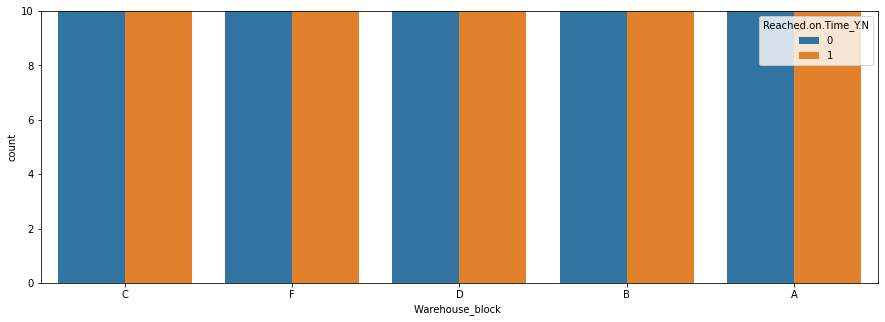

In [30]:
plt.figure(figsize=(15, 5))
plt.ylim(0, 10) # y축의 범위를 0  ~ 10까지로 설정
sns.countplot(data = train,
              x = "Warehouse_block ",
              hue = "Reached.on.Time_Y.N"
             );

In [31]:
train["Warehouse_block "].unique()

array(['C', 'F', 'D', 'B', 'A'], dtype=object)

In [32]:
test["Warehouse_block "].unique()

array(['F', 'A', 'C', 'D', 'B'], dtype=object)

In [33]:
mode = ['C', 'F', 'D', 'B', 'A']
mode

['C', 'F', 'D', 'B', 'A']

In [34]:
convert_mode = ['C', 'F', 'D', 'B', 'A']

In [35]:
mode_dict = dict(zip(mode, convert_mode))
mode_dict

{'C': 'C', 'F': 'F', 'D': 'D', 'B': 'B', 'A': 'A'}

In [36]:
train["Warehouse_block "] = train["Warehouse_block "].map(mode_dict)

In [37]:
train["Warehouse_block "].tail(70)

ID
6930    C
6931    C
6932    C
6933    F
6934    C
       ..
6995    D
6996    F
6997    D
6998    A
6999    A
Name: Warehouse_block , Length: 70, dtype: object

In [38]:
test["Warehouse_block "] = test["Warehouse_block "].map(mode_dict)

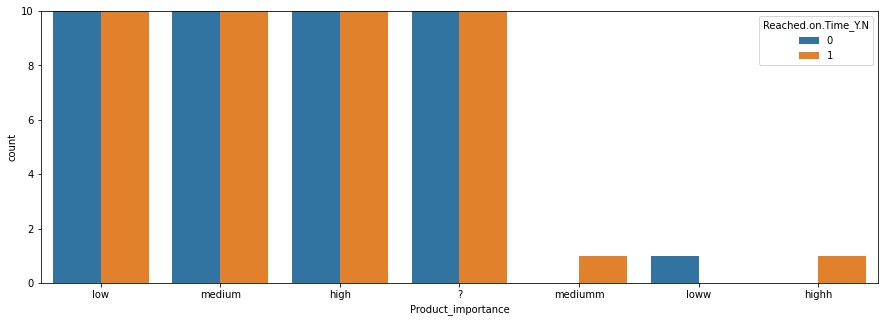

In [39]:
plt.figure(figsize=(15, 5))
plt.ylim(0, 10) # y축의 범위를 0  ~ 10까지로 설정
sns.countplot(data = train,
              x = "Product_importance",
              hue = "Reached.on.Time_Y.N"
             );

In [40]:
train["Product_importance"].unique()

array(['low', 'medium', 'high', '?', 'mediumm', 'loww', 'highh'],
      dtype=object)

In [41]:
test["Product_importance"].unique()

array(['high', 'medium', 'low', '?', 'mediumm'], dtype=object)

In [42]:
product = ['low', 'medium', 'high', '?', 'mediumm', 'loww', 'highh']
product

['low', 'medium', 'high', '?', 'mediumm', 'loww', 'highh']

In [43]:
convert_product = ['low', 'medium', 'high'] + ["Other"] * 4
convert_product

['low', 'medium', 'high', 'Other', 'Other', 'Other', 'Other']

In [44]:
product_dict = dict(zip(product, convert_product))
product_dict

{'low': 'low',
 'medium': 'medium',
 'high': 'high',
 '?': 'Other',
 'mediumm': 'Other',
 'loww': 'Other',
 'highh': 'Other'}

In [45]:
train["Product_importance"] = train["Product_importance"].map(product_dict)

In [46]:
test["Product_importance"] = test["Product_importance"].map(mode_dict)

In [47]:
train.drop("Gender", axis=1, inplace= True)

In [48]:
test.drop("Gender", axis=1, inplace= True)

In [49]:
train.drop("Mode_of_Shipment", axis=1, inplace = True)

In [50]:
test.drop("Mode_of_Shipment", axis=1, inplace = True)

In [51]:
train.drop("Weight_in_gms", axis=1, inplace = True)

In [52]:
test.drop("Weight_in_gms", axis=1, inplace = True)

In [53]:
# train데이터에서 정답 컬럼
y_train = train["Reached.on.Time_Y.N"]
# train데이터에서 정답 컬럼을 삭제한 후 남은 모든 컬럼들
X_train = train.drop("Reached.on.Time_Y.N", axis = 1)
# 맨 처음에 받았던 test.csv
X_test = test

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(6999, 7)
(4000, 7)
(6999,)


In [55]:
# 원 핫 인코딩
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [56]:
print(X_test.shape)
print(X_train.shape)

(4000, 10)
(6999, 14)


In [57]:
X_train.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Warehouse_block _A',
       'Warehouse_block _B', 'Warehouse_block _C', 'Warehouse_block _D',
       'Warehouse_block _F', 'Product_importance_Other',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium'],
      dtype='object')

In [58]:
X_test.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Warehouse_block _A',
       'Warehouse_block _B', 'Warehouse_block _C', 'Warehouse_block _D',
       'Warehouse_block _F'],
      dtype='object')

In [59]:
set(X_train.columns) -set(X_test.columns)

{'Product_importance_Other',
 'Product_importance_high',
 'Product_importance_low',
 'Product_importance_medium'}

In [60]:
set(X_test.columns) -set(X_train.columns)

set()

In [61]:
X_train[X_train['Product_importance_Other']==1]

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Warehouse_block _A,Warehouse_block _B,Warehouse_block _C,Warehouse_block _D,Warehouse_block _F,Product_importance_Other,Product_importance_high,Product_importance_low,Product_importance_medium
ID,,,,,,,,,,,,,,
33,3,2,239,5.0,6.0,0,0,0,0,1,1,0,0,0
42,3,1,139,3.0,13.0,0,0,1,0,0,1,0,0,0
72,3,4,267,3.0,13.0,0,0,1,0,0,1,0,0,0
78,4,5,232,3.0,32.0,0,0,0,0,1,1,0,0,0
150,5,2,223,0.0,13.0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6630,4,5,137,4.0,13.0,0,0,0,0,1,1,0,0,0
6728,5,1,262,2.0,13.0,0,0,1,0,0,1,0,0,0
6909,4,3,180,3.0,13.0,0,0,0,0,1,1,0,0,0


In [62]:
X_train['Product_importance_Other'] = 1

In [63]:
X_train['Product_importance_high'] = 1

In [64]:
X_train['Product_importance_low'] = 1

In [65]:
X_train['Product_importance_medium'] = 1

In [66]:
X_test['Product_importance_Other'] = 0

In [67]:
X_test['Product_importance_high'] = 0

In [68]:
X_test['Product_importance_low'] = 0

In [69]:
X_test['Product_importance_medium'] = 0

In [70]:
knn_md = KNeighborsClassifier(n_neighbors=50)

In [71]:
result_knn = cross_val_score(knn_md,
                             X_train,
                             y_train,
                             cv = 30
                            )

In [72]:
result_knn.mean()

0.6166813396427131

In [73]:
scaler = StandardScaler()

In [74]:
result_knn_train = scaler.fit_transform(X_train)

In [75]:
result_knn_train

array([[-1.66924921, -0.47621263, -0.38049457, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.08662637, -0.01103298,  0.05161731, ...,  0.        ,
         0.        ,  0.        ],
       [-0.75062402, -0.94139229,  0.07082228, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.75062402, -0.94139229,  0.41171054, ...,  0.        ,
         0.        ,  0.        ],
       [-0.75062402, -0.94139229,  0.08522601, ...,  0.        ,
         0.        ,  0.        ],
       [-0.75062402, -0.01103298,  0.2292633 , ...,  0.        ,
         0.        ,  0.        ]])

In [76]:
result_knn_test = scaler.fit_transform(X_test)
result_knn_test

array([[-0.74271618, -0.78863713,  0.3774816 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.74271618,  0.37726722, -0.4746283 , ...,  0.        ,
         0.        ,  0.        ],
       [-0.74271618,  0.765902  , -0.44992946, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.74271618, -0.01136757, -0.04239864, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.94422811,  0.37726722,  0.26016212, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.04858001, -0.78863713,  0.24163799, ...,  0.        ,
         0.        ,  0.        ]])

In [77]:
result_knn_SS = cross_val_score(knn_md,
                                result_knn_train, # 스케일링된 문제데이터
                                y_train,           # 정답 데이터
                                cv = 50
                               )
result_knn_SS

array([0.6       , 0.62857143, 0.57857143, 0.63571429, 0.55      ,
       0.61428571, 0.58571429, 0.66428571, 0.52142857, 0.63571429,
       0.5       , 0.59285714, 0.55      , 0.55714286, 0.59285714,
       0.56428571, 0.60714286, 0.54285714, 0.54285714, 0.64285714,
       0.6       , 0.61428571, 0.62857143, 0.59285714, 0.58571429,
       0.60714286, 0.53571429, 0.57142857, 0.64285714, 0.55      ,
       0.52142857, 0.6       , 0.61428571, 0.59285714, 0.55      ,
       0.55      , 0.62857143, 0.52142857, 0.64285714, 0.62857143,
       0.59285714, 0.57857143, 0.6       , 0.59285714, 0.56428571,
       0.62857143, 0.62857143, 0.60714286, 0.55      , 0.61151079])

In [78]:
result_knn_SS.mean()

0.5888016443987667

In [79]:
tree_md = DecisionTreeClassifier(max_depth=3)

In [80]:
result_DT = cross_val_score(tree_md, # 위에서 만든 모델
                            X_train, # 학습용 문제 데이터
                            y_train, # 학습용 정답 데이터
                            cv = 50 # cv = 나눌개수
                           )
result_DT

array([0.6       , 0.65714286, 0.6       , 0.58571429, 0.59285714,
       0.61428571, 0.57857143, 0.68571429, 0.65      , 0.57857143,
       0.63571429, 0.63571429, 0.61428571, 0.6       , 0.62857143,
       0.57857143, 0.63571429, 0.67142857, 0.58571429, 0.65714286,
       0.58571429, 0.64285714, 0.55      , 0.62142857, 0.62857143,
       0.62142857, 0.62857143, 0.61428571, 0.58571429, 0.59285714,
       0.56428571, 0.65      , 0.61428571, 0.61428571, 0.55714286,
       0.5       , 0.63571429, 0.59285714, 0.53571429, 0.61428571,
       0.65714286, 0.65714286, 0.65714286, 0.57142857, 0.58571429,
       0.66428571, 0.66428571, 0.62142857, 0.6       , 0.61151079])

In [81]:
result_DT.mean()

0.6125159301130525

In [82]:
forest_md = RandomForestClassifier(n_estimators=100,
                                   random_state=10)
forest_md


RandomForestClassifier(random_state=10)

In [83]:
result_RF = cross_val_score(forest_md, # 위에서 만든 모델
                            X_train, # 학습용 문제 데이터
                            y_train, # 학습용 정답 데이터
                            cv = 50 # cv = 나눌개수
                           )
result_RF    

array([0.57857143, 0.60714286, 0.55      , 0.6       , 0.51428571,
       0.6       , 0.53571429, 0.55714286, 0.47857143, 0.59285714,
       0.57857143, 0.58571429, 0.51428571, 0.53571429, 0.55714286,
       0.6       , 0.55      , 0.58571429, 0.55      , 0.53571429,
       0.64285714, 0.58571429, 0.47857143, 0.57142857, 0.60714286,
       0.55      , 0.54285714, 0.55      , 0.6       , 0.59285714,
       0.58571429, 0.57142857, 0.60714286, 0.56428571, 0.55      ,
       0.57857143, 0.54285714, 0.52857143, 0.61428571, 0.62142857,
       0.57857143, 0.67857143, 0.61428571, 0.5       , 0.55      ,
       0.62142857, 0.63571429, 0.53571429, 0.61428571, 0.56115108])

In [84]:
result_RF.mean()

0.5716515930113052

In [85]:
voting_md = VotingClassifier(estimators=[
                                 ("knn1", knn_md),
                                 ("tree1", tree_md),
                                 ("forest1", forest_md),
                                  ],
                                  voting="hard"  #soft, hard
                               )

In [86]:
result_vo = cross_val_score(voting_md,
                                X_train, 
                                y_train,           # 정답 데이터
                                cv = 50
                               )
result_vo

array([0.60714286, 0.65      , 0.61428571, 0.61428571, 0.58571429,
       0.60714286, 0.6       , 0.65714286, 0.62857143, 0.6       ,
       0.58571429, 0.6       , 0.63571429, 0.57142857, 0.60714286,
       0.61428571, 0.6       , 0.67857143, 0.58571429, 0.67142857,
       0.60714286, 0.63571429, 0.54285714, 0.65      , 0.65      ,
       0.60714286, 0.65      , 0.60714286, 0.6       , 0.58571429,
       0.62142857, 0.63571429, 0.62142857, 0.62857143, 0.56428571,
       0.52142857, 0.58571429, 0.6       , 0.6       , 0.66428571,
       0.64285714, 0.69285714, 0.65714286, 0.55714286, 0.64285714,
       0.67857143, 0.62857143, 0.62857143, 0.63571429, 0.58992806])

In [87]:
result_vo.mean()

0.6169414182939363

In [94]:
result_submission = pd.read_csv("data/sampleSubmission.csv")
result_submission

,ID,Reached.on.Time_Y.N
0,7000,NaN
1,7001,NaN
2,7002,NaN
3,7003,NaN
4,7004,NaN
...,...,...
3995,10995,NaN
3996,10996,NaN
3997,10997,NaN
3998,10998,NaN


In [95]:
X_train.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Warehouse_block _A',
       'Warehouse_block _B', 'Warehouse_block _C', 'Warehouse_block _D',
       'Warehouse_block _F', 'Product_importance_Other',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium'],
      dtype='object')

In [96]:
X_test.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Warehouse_block _A',
       'Warehouse_block _B', 'Warehouse_block _C', 'Warehouse_block _D',
       'Warehouse_block _F', 'Product_importance_Other',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium'],
      dtype='object')

In [97]:
voting_md.fit(X_train, y_train) 
pre = voting_md.predict(X_test)   
pre 

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [98]:
result_submission["Reached.on.Time_Y.N"] = pre

In [99]:
result_submission.to_csv("sampleSubmission_tree3.csv", index=False)